In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split

%matplotlib inline

In [9]:
df = pd.read_csv('./data/DT_ice_data2.csv')
df.shape

(16, 6)

In [10]:
df.head()

,Gender,Useful,Beautiful,Self-made,Edible,Liked
0,male,yes,yes,no,yes,yes
1,male,yes,yes,yes,no,yes
2,male,yes,no,yes,no,yes
3,male,yes,yes,no,no,yes
4,male,no,yes,yes,yes,yes


In [11]:
df.tail()

,Gender,Useful,Beautiful,Self-made,Edible,Liked
11,female,no,no,no,no,yes
12,female,no,little,yes,no,yes
13,female,no,little,yes,no,yes
14,female,no,little,no,yes,no
15,female,no,little,no,no,no


In [12]:
liked_map = {"yes": 1, "no":0}
edible_map = {"yes": 1, "no":0}
beautiful_map = {"yes":1, "no": 0, "little": 2}
useful_map = {"no": 0, "yes": 1}
gender_map = {"female": 0, "male": 1}
self_made_map = {"yes": 1, "no": 0}


df['Gender'] = df['Gender'].map(gender_map)
df['Useful'] = df['Useful'].map(useful_map)
df['Beautiful'] = df['Beautiful'].map(beautiful_map)
df['Self-made'] = df['Self-made'].map(self_made_map)
df['Edible'] = df['Edible'].map(edible_map)
df['Liked'] = df['Liked'].map(liked_map)

feature_col_names = ['Gender','Useful','Beautiful','Self-made','Edible']
target = ['Liked']
X = df[feature_col_names].values
y = df[target].values

In [13]:
# split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0, random_state=3)

In [14]:
d3_model = tree.DecisionTreeClassifier(criterion="entropy",max_depth=10)
d3_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

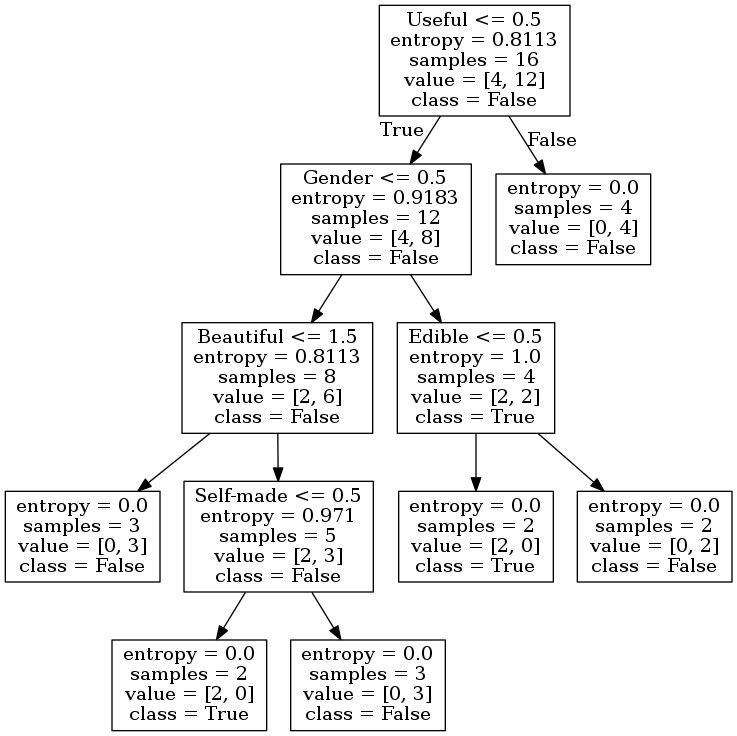

In [15]:
from IPython.display import Image 
import pydotplus

dot_data = tree.export_graphviz(d3_model, out_file=None, feature_names=feature_col_names, class_names=["True","False"])
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())